<a href="https://colab.research.google.com/github/Sanmuga/Mobile-price-prediction/blob/main/mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn

In [ ]:
pip install seaborn

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [10]:
# Load the dataset
train_data = pd.read_csv('/content/train.csv')

# Explore the data
train_data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
# Remove data points with missing data
train_data = train_data[train_data['sc_w'] != 0]

# Split the data into features (X) and target (y)
X = train_data.drop(['price_range'], axis=1)
y = train_data['price_range']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)


In [12]:
# Random Forest Classifier
rfc = RandomForestClassifier(bootstrap=True, max_depth=7, max_features=15,
                             min_samples_leaf=3, min_samples_split=10,
                             n_estimators=200, random_state=7)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_valid)
print('Random Forest Classifier Accuracy Score:', accuracy_score(y_valid, y_pred_rfc))

# Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_valid)
print('Gaussian NB Classifier Accuracy Score:', accuracy_score(y_valid, y_pred_gnb))

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3, leaf_size=25)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)
print('KNN Classifier Accuracy Score:', accuracy_score(y_valid, y_pred_knn))

# SVM Classifier
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_valid)
print('SVM Classifier Accuracy Score:', accuracy_score(y_valid, y_pred_svm))


Random Forest Classifier Accuracy Score: 0.9093406593406593
Gaussian NB Classifier Accuracy Score: 0.8461538461538461
KNN Classifier Accuracy Score: 0.9340659340659341
SVM Classifier Accuracy Score: 0.9587912087912088


              precision    recall  f1-score   support

           0       0.98      0.97      0.97        95
           1       0.90      0.92      0.91        92
           2       0.82      0.86      0.84        86
           3       0.93      0.88      0.90        91

    accuracy                           0.91       364
   macro avg       0.91      0.91      0.91       364
weighted avg       0.91      0.91      0.91       364



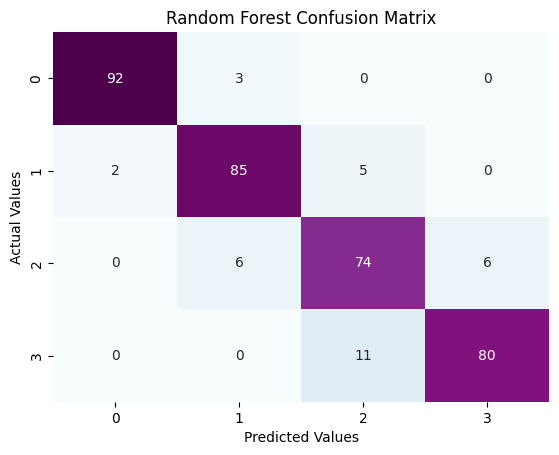

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.79      0.73      0.76        92
           2       0.74      0.80      0.77        86
           3       0.92      0.93      0.93        91

    accuracy                           0.85       364
   macro avg       0.84      0.85      0.84       364
weighted avg       0.85      0.85      0.85       364



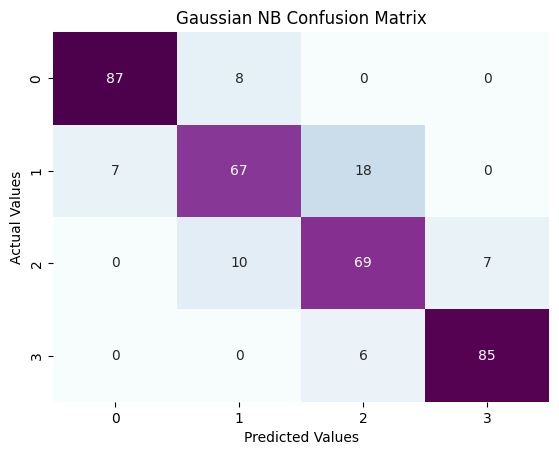

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.87      0.88      0.88        86
           3       0.94      0.90      0.92        91

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



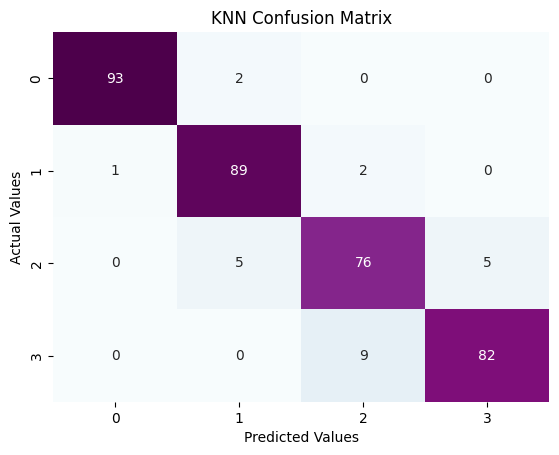

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.94      0.93      0.94        86
           3       0.99      0.96      0.97        91

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



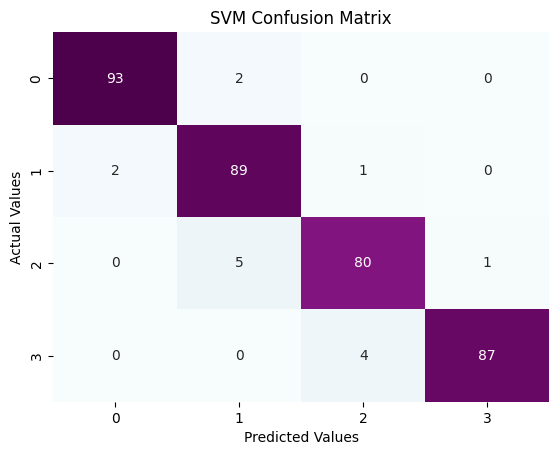

In [13]:
# Define a function for creating a confusion matrix
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()

# Display confusion matrices and classification reports
my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix')
my_confusion_matrix(y_valid, y_pred_gnb, 'Gaussian NB Confusion Matrix')
my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix')
my_confusion_matrix(y_valid, y_pred_svm, 'SVM Confusion Matrix')
